<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Applied-Modeling/blob/master/V6__BEST_F_SCORE_Top_4_features_only_RFClassifier_classification_Bhav_DengueAI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/

##LIST OF FEATURES:
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

###City and date indicators
1. city – City abbreviations: sj for San Juan and iq for Iquitos
2. week_start_date – Date given in yyyy-mm-dd format
###NOAA's GHCN daily climate data weather station measurements
1. station_max_temp_c – Maximum temperature
2. station_min_temp_c – Minimum temperature
3. station_avg_temp_c – Average temperature
4. station_precip_mm – Total precipitation
5. station_diur_temp_rng_c – Diurnal temperature range

###PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

6. precipitation_amt_mm – Total precipitation

###NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

7. reanalysis_sat_precip_amt_mm – Total precipitation
8. reanalysis_dew_point_temp_k – Mean dew point temperature
9. reanalysis_air_temp_k – Mean air temperature
10. reanalysis_relative_humidity_percent – Mean relative humidity
11. reanalysis_specific_humidity_g_per_kg – Mean specific humidity
12. reanalysis_precip_amt_kg_per_m2 – Total precipitation
13. reanalysis_max_air_temp_k – Maximum air temperature
14. reanalysis_min_air_temp_k – Minimum air temperature
15. reanalysis_avg_temp_k – Average air temperature
16. reanalysis_tdtr_k – Diurnal temperature range

###Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
17. ndvi_se – Pixel southeast of city centroid
18. ndvi_sw – Pixel southwest of city centroid
19. ndvi_ne – Pixel northeast of city centroid
20. ndvi_nw – Pixel northwest of city centroid

In [0]:
import sys

In [0]:
#Load train features and labels datasets
train_features = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv')

In [5]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
train_features.shape

(1456, 24)

In [0]:
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv')

In [8]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [9]:
train_labels.shape

(1456, 4)

In [0]:
#Merge train features and labels datasets

In [0]:
train = pd.merge(train_features, train_labels)

In [12]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
train.shape
#city, year and week of year columns are duplicate in train_features and train_labels datasets so the total_cases column is added to the features dataset

(1456, 25)

In [14]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [15]:
train['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [16]:
dengue_cases = train['total_cases']
dengue_cases

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [17]:
np.percentile(dengue_cases, 95)

81.25

In [0]:
#Thus, we can isolate a column with total_cases >81.25 as dengue outbreaks as they represent >2 S.D or > 95 percentile

In [0]:
#create a new column 'dengue_outbreak' with total_cases >81.25 and drop total_cases column
train['dengue_outbreak']  = train['total_cases'] > 81.25

In [0]:
#Can do Pandas profiling here

In [21]:
#Do train, val split
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['dengue_outbreak'], 
                              random_state=42, )
train.shape, val.shape

((1164, 26), (292, 26))

In [0]:
#Baseline statistics for the target variable total_cases in train dataset

In [23]:
train['dengue_outbreak'].value_counts(normalize=True)

False    0.950172
True     0.049828
Name: dengue_outbreak, dtype: float64

In [0]:
#Thus, dengue outbreaks occur only in 4.98% of cases in train dataset and are minority class

In [25]:
train.head().T

,115,1360,950,186,406
city,sj,iq,iq,sj,sj
year,1992,2008,2000,1993,1998
weekofyear,29,35,40,47,8
week_start_date,1992-07-15,2008-08-26,2000-10-07,1993-11-26,1998-02-19
ndvi_ne,0.112,0.318186,0.33754,0.1071,NaN
ndvi_nw,0.1255,0.319767,0.276943,0.1818,0.0754
ndvi_se,0.14214,0.308171,0.2775,0.260057,0.239571
ndvi_sw,0.182533,0.3236,0.25505,0.270586,0.2387
precipitation_amt_mm,94.14,58.2,46.22,91.81,0
reanalysis_air_temp_k,299.79,298.574,298.373,298.571,297.59


In [0]:
#we need to convert week_start_date to numeric form uisng pd.to_dateime function
#wrangle function 

def wrangle(X):
  X = X.copy()
       
    # Convert week_start_date to numeric form
  X['week_start_date'] = pd.to_datetime(X['week_start_date'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
  X['year_recorded'] = X['week_start_date'].dt.year
  X['month_recorded'] = X['week_start_date'].dt.month
  #X['day_recorded'] = X['week_start_date'].dt.day
  X = X.drop(columns='week_start_date')
  X = X.drop(columns='year')
  #Drop mean air temp feature which has negative weight on permu. imp plot

#Rename columns
#Keep only top 4 features with positive weights from permutation importance plots
  X.rename(columns= {'weekofyear':'Week of Year'}, inplace=True)#stay  
  X.rename(columns= {'year_recorded':'Year recorded'}, inplace=True)#stay
  X.rename(columns= {'month_recorded':'Month recorded'}, inplace=True)#stay  
  X.rename(columns= {'ndvi_se':'Southeast vegetation index'}, inplace=True)#stay
  
#Drop unnecessary features
  X = X.drop(columns='total_cases')
  X = X.drop(columns='reanalysis_air_temp_k')
  X = X.drop(columns='reanalysis_min_air_temp_k')
  X = X.drop(columns='station_diur_temp_rng_c')
  X = X.drop(columns='reanalysis_precip_amt_kg_per_m2')
  X = X.drop(columns='reanalysis_tdtr_k')
  X = X.drop(columns='reanalysis_max_air_temp_k')
  X = X.drop(columns='reanalysis_relative_humidity_percent')
  X = X.drop(columns='reanalysis_dew_point_temp_k')
  X = X.drop(columns='precipitation_amt_mm')
  X = X.drop(columns='station_min_temp_c')
  X = X.drop(columns='ndvi_ne')
  X = X.drop(columns='ndvi_nw')
  X = X.drop(columns='ndvi_sw')
  X = X.drop(columns='reanalysis_avg_temp_k')
  X = X.drop(columns='reanalysis_sat_precip_amt_mm')
  X = X.drop(columns='reanalysis_specific_humidity_g_per_kg')
  X = X.drop(columns='station_avg_temp_c')
  X = X.drop(columns='station_max_temp_c')
  X = X.drop(columns='station_precip_mm')

 

    # return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)


In [27]:
train.head().T

,115,1360,950,186,406
city,sj,iq,iq,sj,sj
Week of Year,29,35,40,47,8
Southeast vegetation index,0.14214,0.308171,0.2775,0.260057,0.239571
dengue_outbreak,False,False,False,False,False
Year recorded,1992,2008,2000,1993,1998
Month recorded,7,8,10,11,2


In [0]:
#Define target and features

In [0]:
# The status_group column is the target
target = 'dengue_outbreak'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [31]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.9MB/s 


In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing

In [0]:
processor = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent')
)

In [0]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

In [0]:
#MODEL PARAMETERS TUNED FROM RANDOMSEARCHCV CROSS VALIDATION
model = RandomForestClassifier(n_estimators=821, random_state=42, n_jobs=-1, max_depth=25, max_features='auto')

In [36]:
model.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=821,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
#Validation accuracy
model.score(X_val_processed, y_val)

0.9657534246575342

In [0]:
#predict on X_val
y_pred = model.predict(X_val_processed)

In [0]:
# Predicted probabilities for positive class
y_pred_proba = model.predict_proba(X_val_processed)[:, 1] # Probability for positive class

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)
#ROC-AUC score for positive class i.e dengue outbreak = 83%

0.9496991576413958

In [41]:
# Compute the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[276,   1],
       [  9,   6]])

In [42]:
pip install scikit-plot

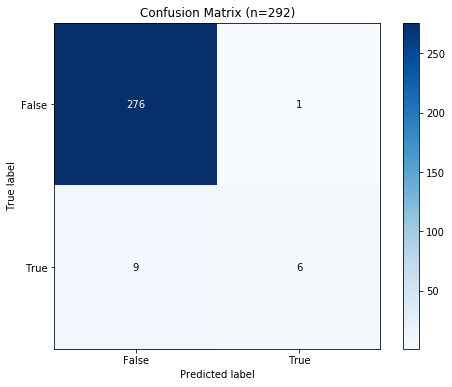

In [43]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_val, y_pred, 
                                    figsize=(8,6),
                                    title=f'Confusion Matrix (n={len(y_val)})',
                                    normalize=False);

In [44]:
#F SCORE, PRECISION AND RECAL, F SCORE BETTER METRIC THAN ROC-AUC OR ACCURACY FOR IMBLANCED DATA
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       277
        True       0.86      0.40      0.55        15

    accuracy                           0.97       292
   macro avg       0.91      0.70      0.76       292
weighted avg       0.96      0.97      0.96       292



In [0]:
#BEST F1 SCORE AMONG ALL NOTEBOOKS FOR TRUE (POSITIVE DENGUE OUTBREAK = 55%), INCREASED FROM 22% BEFORE HYPERPARAMETER TUNING.
#ALSO HIGHEST PRECISION (PPV) FOR TRUE CLASS 86%

In [0]:
#ROC-AUC SCORE

In [0]:
# Predicted probabilities for positive class
y_pred_proba2 = model.predict_proba(X_val_processed)[:, 1] # Probability for positive class

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba2)

In [49]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.937881
1,0.000000,0.066667,0.937881
2,0.000000,0.266667,0.788063
3,0.003610,0.266667,0.707674
4,0.003610,0.466667,0.440926
5,0.010830,0.466667,0.403167
6,0.010830,0.533333,0.304507
7,0.018051,0.533333,0.274056
8,0.018051,0.666667,0.265530
9,0.036101,0.666667,0.185140


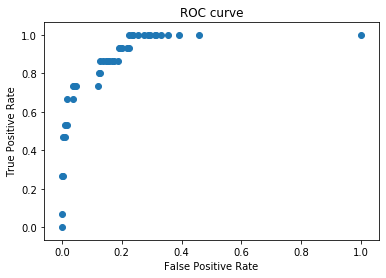

In [50]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [51]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba2)

0.9496991576413958

In [0]:
#Eli5 Permutation Importance Plot showing weights

In [53]:
pip install eli5

     |████████████████████████████████| 112kB 3.4MB/s 


In [54]:
#PERMUTATION IMPORTANCE PLOT WITH SCORING METRIC ='ACCURACY'
import eli5
from eli5.sklearn import PermutationImportance
#Eli5 needs ordinal encoding
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent') 
)
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = RandomForestClassifier(n_estimators=821, random_state=42, n_jobs=-1, max_depth=25, max_features='auto')
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring= 'accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed, y_val)
permuter.feature_importances_
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Using TensorFlow backend.


Weight,Feature
0.0301 ± 0.0159,Year recorded
0.0110 ± 0.0027,Southeast vegetation index
0.0103 ± 0.0043,Month recorded
0.0096 ± 0.0080,Week of Year
0.0082 ± 0.0093,city


In [55]:
#RERUN PERMUTATION IMPORTANCE PLOT WITH SCORING METRIC ='F1 SCORE'
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent') 
)
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = RandomForestClassifier(n_estimators=821, random_state=42, n_jobs=-1, max_depth=25, max_features='auto')
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring= 'f1',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed, y_val)
permuter.feature_importances_
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.4478 ± 0.1160,Year recorded
0.2932 ± 0.0817,Month recorded
0.2839 ± 0.1501,Southeast vegetation index
0.1723 ± 0.0825,Week of Year
0.1079 ± 0.0879,city
